In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [89]:
# Display Settings

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option("display.max_rows", None)
pd.set_option('max_colwidth', 600)

InteractiveShell.ast_node_interactivity = "all"

In [85]:
# Read in file
test_file = open('events.txt')
df = pd.read_csv('events.txt', sep=' /// ', header=None)
df.head(5)

/tmp/ipykernel_16/660439069.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('events.txt', sep=' /// ', header=None)


,0,1
0,"Even as the secretary of homeland security was putting his people on high alert last month, a 30-foot Cuban patrol boat with four heavily armed men landed on American shores, utterly undetected by the Coast Guard Secretary Ridge now leads",a 30-foot Cuban patrol boat with four heavily armed men landed on American shores
1,He lost an election to a dead man,election to a dead man
2,"Paul, as I understand your definition of a political -- of a professional politician based on that is somebody who is elected to public office",who is elected to public office
3,"Hire professionals, Mr. President",Hire professionals
4,"It's OK to put Democratic career politicians at the Pentagon and the Justice Department if they're Democrats but not if they're Republicans, is that right",put Democratic career politicians at the Pentagon and the Justice Department


In [86]:
# Set up new columns
df.rename(columns={0: 'source_sentence', 
                   1: 'event'}, inplace=True, errors="raise")
df.shape
df['new_sentence'] = df['event'].str.lower()

(3341, 2)

In [95]:
# Analyze event word count
df['event_word_ct'] = df['event'].str.split().str.len()

print('fewest words: ', df['event_word_ct'].min())
print('most words: ', df['event_word_ct'].max())

fewest words:  1
most words:  70


<Figure size 2000x1000 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fd6b5753940>,
 [Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23'),
  Text(24.0, 0, '24'),
  Text(25.0, 0, '25'),
  Text(26.0, 0, '26'),
  Text(27.0, 0, '27'),
  Text(28.0, 0, '28'),
  Text(29.0, 0, '29'),
  Text(30.0, 0, '30'),
  Text(31.0, 0, '31'),
  Text(32.0, 0, '32'),
  Text(33.0, 0, '33'),
  Text(34.0, 0, '34'),
  Text(35.0, 0, '35'),
  Text(36.0, 0, '36'),
  Text(37.0, 0, '37'),
  Text(38.0, 0, '38'),
  Text(39.0, 0, '39'),
  Text(40.0, 0, '40'),
  Text(41.0, 0, '41'),
  Text(42.0, 0, '42'),
  Text(

Text(0.5, 0, 'Number of Words')

Text(0, 0.5, 'Count of Events')

[Text(0, 0, '331'),
 Text(0, 0, '139'),
 Text(0, 0, '207'),
 Text(0, 0, '206'),
 Text(0, 0, '216'),
 Text(0, 0, '178'),
 Text(0, 0, '215'),
 Text(0, 0, '176'),
 Text(0, 0, '176'),
 Text(0, 0, '156'),
 Text(0, 0, '143'),
 Text(0, 0, '130'),
 Text(0, 0, '120'),
 Text(0, 0, '108'),
 Text(0, 0, '113'),
 Text(0, 0, '86'),
 Text(0, 0, '84'),
 Text(0, 0, '74'),
 Text(0, 0, '54'),
 Text(0, 0, '54'),
 Text(0, 0, '45'),
 Text(0, 0, '52'),
 Text(0, 0, '41'),
 Text(0, 0, '33'),
 Text(0, 0, '31'),
 Text(0, 0, '26'),
 Text(0, 0, '24'),
 Text(0, 0, '12'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '3'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '15'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),

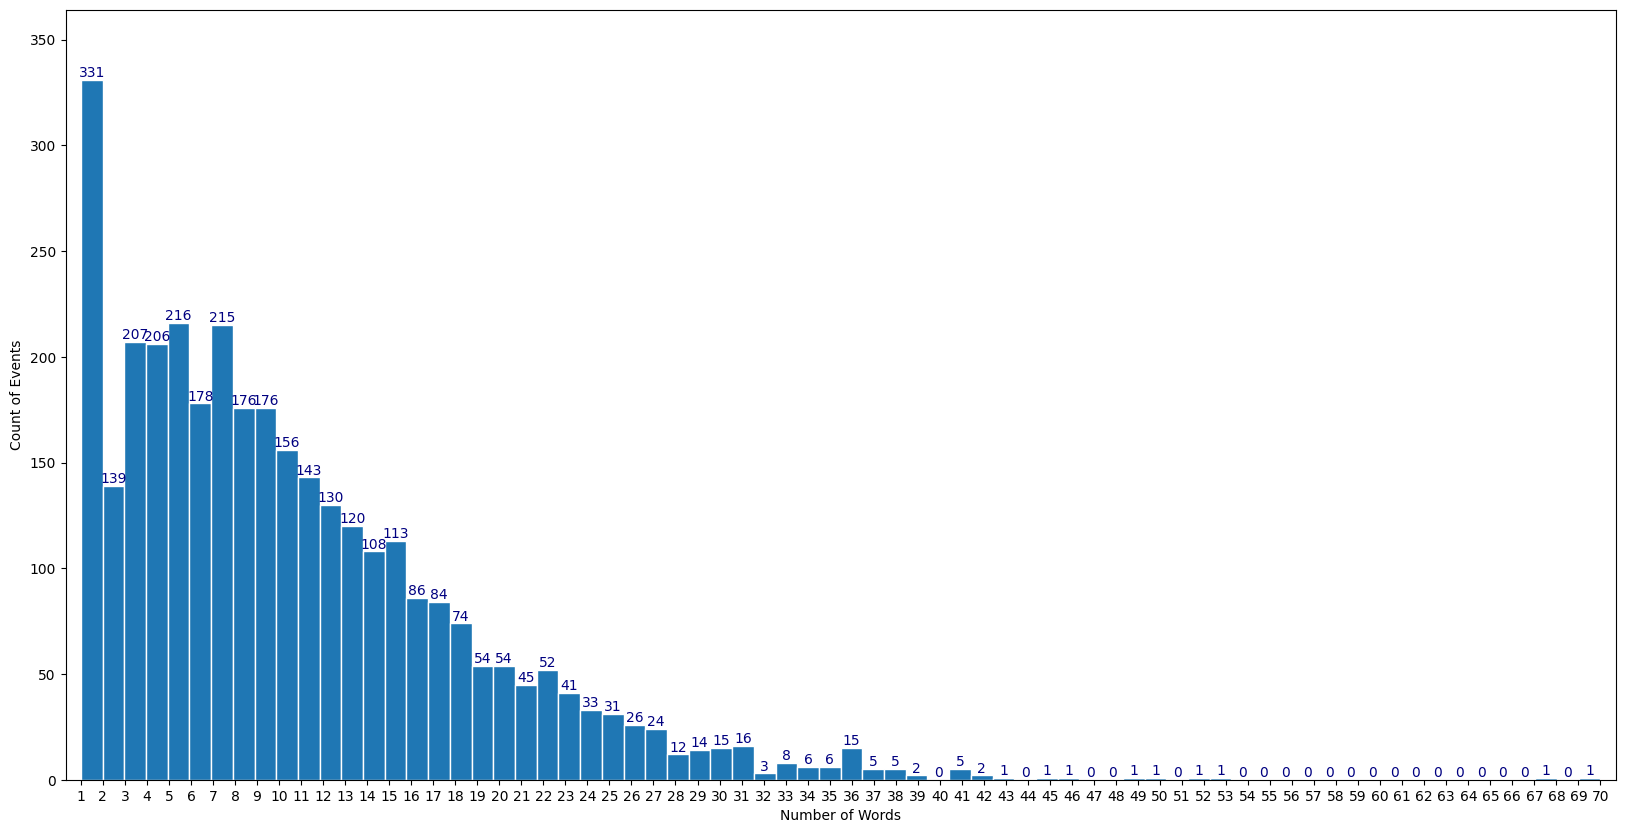

In [96]:
# Plot word count

InteractiveShell.ast_node_interactivity = 'last'
plt.figure(figsize=(20,10))
values, bins, bars = plt.hist(df['event_word_ct'], bins=70, edgecolor='white')
x = df['event_word_ct']
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Number of Words")
plt.ylabel('Count of Events')
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

In [74]:
df.loc[df['event_word_ct']==1].sample(n=5)

,source_sentence,event,new_sentence,event_word_ct
134,"One of the reasons that we like having you on, and as well as Mr. Rangel, is that, you know, this is war, as we were saying in the last segment",war,war,1
3193,"Israeli and American officials say that the Palestinian president, Mahmoud Abbas, has told them that he, too, regards Hezbollah as a destructive force in the Middle East, one determined to undermine peace talks by supporting militant groups that attack Israelis",talks,talks,1
2018,The conduct of the trials was widely criticised internationally and the United States still lists Anwar as a political prisoner,trials,trials,1
628,Saba hasn't delivered yet,delivered,delivered,1
169,But I didn't know it was going to bother me as much as it did,it,it,1


#### Word Rules Implemented

In [ ]:
# If event = [

In [87]:
df.head(5)

,source_sentence,event,new_sentence
0,"Even as the secretary of homeland security was putting his people on high alert last month, a 30-foot Cuban patrol boat with four heavily armed men landed on American shores, utterly undetected by the Coast Guard Secretary Ridge now leads",a 30-foot Cuban patrol boat with four heavily armed men landed on American shores,a 30-foot cuban patrol boat with four heavily armed men landed on american shores
1,He lost an election to a dead man,election to a dead man,election to a dead man
2,"Paul, as I understand your definition of a political -- of a professional politician based on that is somebody who is elected to public office",who is elected to public office,who is elected to public office
3,"Hire professionals, Mr. President",Hire professionals,hire professionals
4,"It's OK to put Democratic career politicians at the Pentagon and the Justice Department if they're Democrats but not if they're Republicans, is that right",put Democratic career politicians at the Pentagon and the Justice Department,put democratic career politicians at the pentagon and the justice department


In [20]:
df.columns

Index([0, 1], dtype='int64')

In [22]:
df.index

RangeIndex(start=0, stop=3341, step=1)

In [94]:
df2 = df.loc[df['event_word_ct']==1]
df2['event'].value_counts()

KeyError: 'event_word_ct'